In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (105, 4)
Testing data shape: (45, 4)


In [4]:
# Initialize the base estimator (weak learner)
estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoostClassifier with the estimator
ada_boost = AdaBoostClassifier(estimator=estimator, n_estimators=50, random_state=42)

# Train the model on the training data
ada_boost.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = ada_boost.predict(X_test)

# Print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the AdaBoost model: {accuracy * 100:.2f}%')


Accuracy of the AdaBoost model: 100.00%


C:\Users\ahmed\anaconda3\envs\neuralnetwork\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



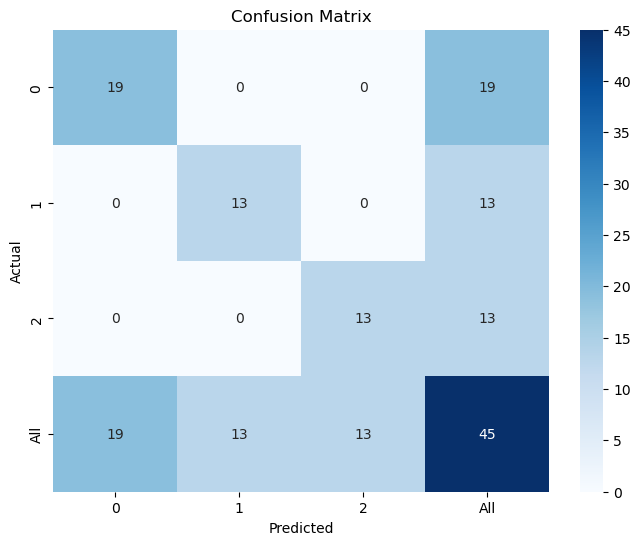

In [5]:
# Print classification report for detailed performance metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

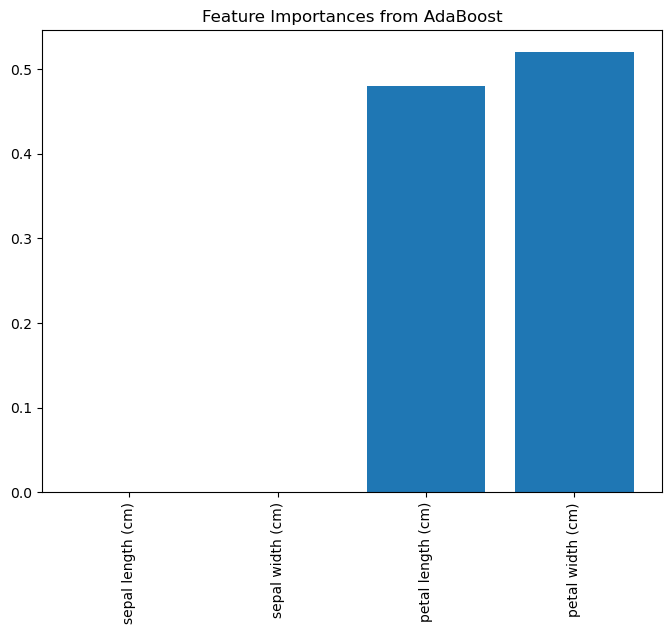

In [6]:
# Plot the feature importances as provided by AdaBoost
plt.figure(figsize=(8, 6))
plt.bar(range(len(iris.feature_names)), ada_boost.feature_importances_, align='center')
plt.xticks(range(len(iris.feature_names)), iris.feature_names, rotation=90)
plt.title('Feature Importances from AdaBoost')
plt.show()